In [4]:
!pip install tensorflow


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 201s 1us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


C:\Users\HP\anaconda3\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 84ms/step - accuracy: 0.3168 - loss: 1.8391 - val_accuracy: 0.5134 - val_loss: 1.3473
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 84ms/step - accuracy: 0.5391 - loss: 1.2963 - val_accuracy: 0.5716 - val_loss: 1.1889
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.5953 - loss: 1.1391 - val_accuracy: 0.6147 - val_loss: 1.0817
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 75ms/step - accuracy: 0.6359 - loss: 1.0320 - val_accuracy: 0.6468 - val_loss: 1.0158
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - accuracy: 0.6697 - loss: 0.9405 - val_accuracy: 0.6759 - val_loss: 0.9288
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 78ms/step - accuracy: 0.6931 - loss: 0.8666 - val_accuracy: 0.6721 - val_loss: 0.9397
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - accuracy: 0.7120 - loss: 0.8208 - val_accuracy: 0.6912 - val_loss: 0.8910
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.7317 - loss: 0.7611 - 

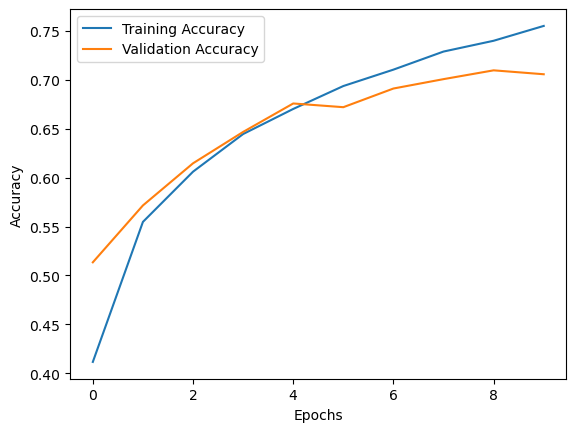

In [5]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the image pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Print dataset shape for confirmation
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
# Initialize the model
model = models.Sequential([
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten the output and pass it to a fully connected layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


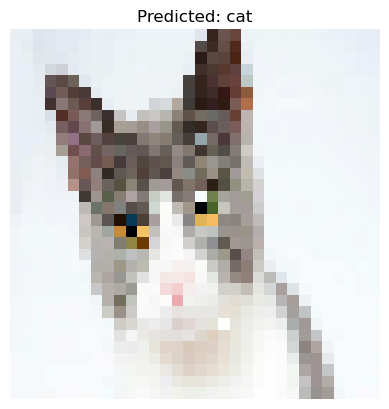

In [6]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
img_path = "C:\\Users\\HP\\Downloads\\pexels-pixabay-104827.jpg"  # Replace with your image path
img = image.load_img(img_path, target_size=(32, 32))  # Resize to 32x32 pixels
img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

# CIFAR-10 class labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display the image with the prediction
plt.imshow(image.array_to_img(img_array[0]))
plt.title(f"Predicted: {class_labels[predicted_class]}")
plt.axis("off")
plt.show()
